# <center>**THUẬT TOÁN HOG**</center>

## 1. Gradient

Setup picture

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
img = plt.imread('data\\raw_data\\111.png', cv2.IMREAD_UNCHANGED)

FileNotFoundError: [Errno 2] No such file or directory: 'data\\raw_data\\111.png'

image shape: (467, 700, 3)
gray shape:  (467, 700)


Text(0.5, 1.0, 'Gray Image')

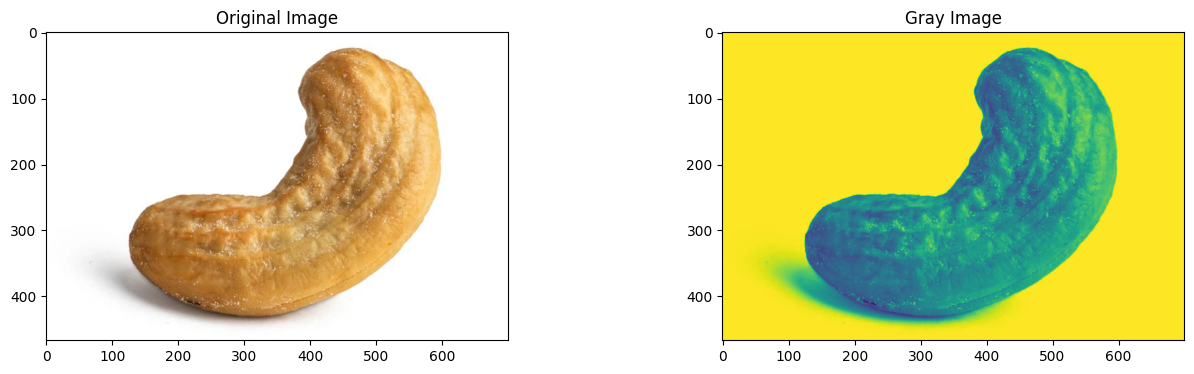

In [ ]:

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print('image shape:', img.shape)
print('gray shape: ', gray.shape)

plt.figure(figsize = (16, 4))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(gray)
plt.title('Gray Image')

Calculate Gradients

gray shape: (467, 700)
gx shape: (467, 700)
gy shape: (467, 700)
gradient format: (467, 700)
theta format: (467, 700)


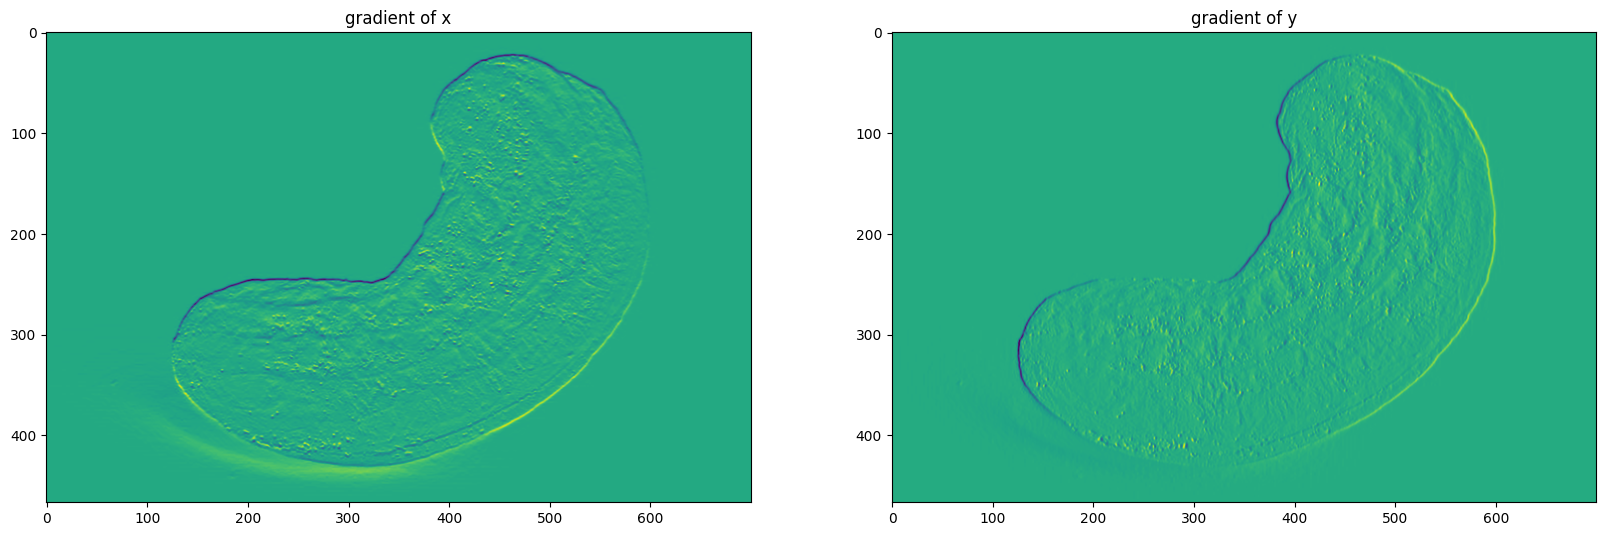

In [ ]:
# sử dụng bộ lọc Sobel để tính Gradients
gx = cv2.Sobel(gray, cv2.CV_32F, dx=0, dy=1, ksize=3)
gy = cv2.Sobel(gray, cv2.CV_32F, dx=1, dy=0, ksize=3)

print('gray shape: {}'.format(gray.shape))
print('gx shape: {}'.format(gx.shape))
print('gy shape: {}'.format(gy.shape))

# Chuyển từ tọa độ sang Polar (tính toán độ lớn và phương gradients)
# angleInDegrees: phương tính theo độ
# g:  Ma trận chứa thông tin về độ lớn của gradient tại mỗi điểm ảnh.
# theta: Ma trận chứa thông tin về hướng của gradient tại mỗi điểm ảnh, được tính theo độ
g, theta = cv2.cartToPolar(gx, gy, angleInDegrees=True) 
print('gradient format: {}'.format(g.shape))
print('theta format: {}'.format(theta.shape))

w = 20
h = 10
plt.figure(figsize=(w, h))

plt.subplot(1, 2, 1)
plt.title('gradient of x')
plt.imshow(gx)

plt.subplot(1, 2, 2)
plt.title('gradient of y')
plt.imshow(gy)



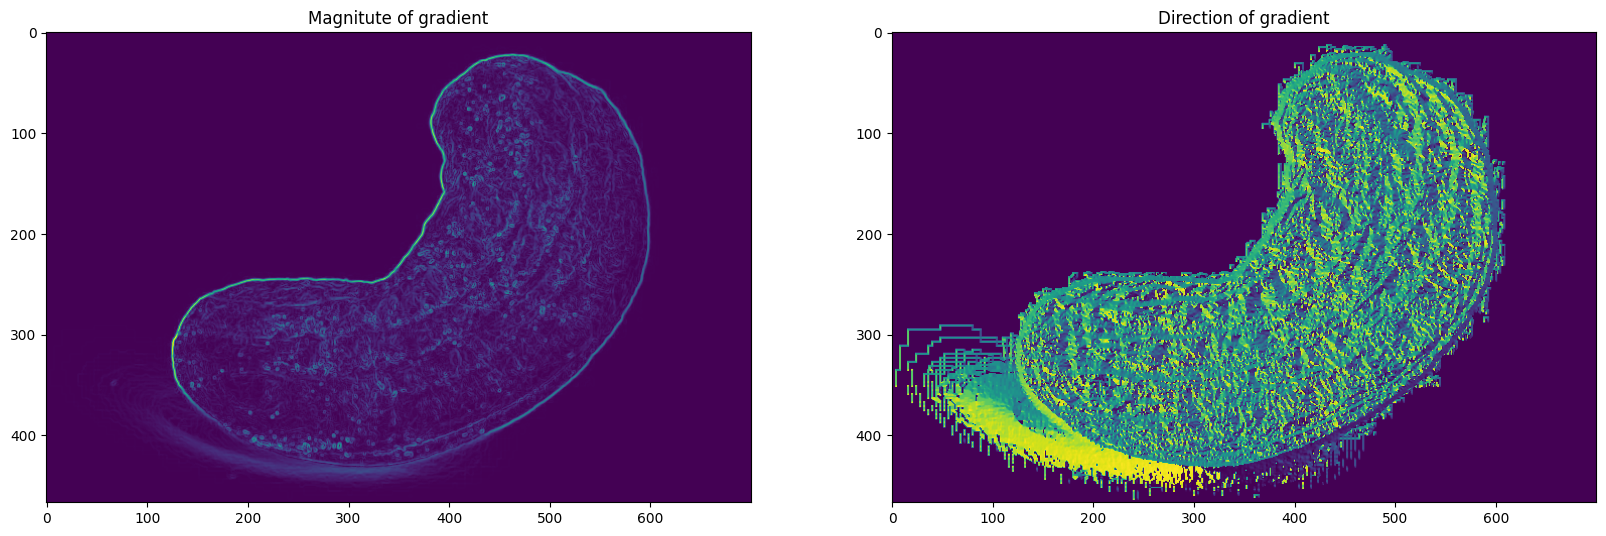

In [ ]:
w = 20
h = 10
plt.figure(figsize=(w, h))

plt.subplot(1, 2, 1)
plt.title('Magnitute of gradient')
plt.imshow(g)

plt.subplot(1, 2, 2)
plt.title('Direction of gradient')
plt.imshow(theta)

### Thực hành tính HOG
*nbins*: Số lượng bins trong biểu đồ histogram.

*cellSize*: Kích thước của một ô (đơn vị pixels).

*winSize*: Kích thước của cửa sổ (đơn vị pixels).

*blockSize*: Kích thước của một block (đơn vị pixels) mà trên đó ta chuẩn hóa véc tơ histogram tổng hợp.

*winStride*: Số bước stride (đơn vị pixels) khi di chuyển window trên ảnh gốc để tính véc tơ histogram trên mỗi block của ảnh.

In [ ]:
img = cv2.convertScaleAbs(img)

print('Kích thước ảnh gốc: ', img.shape)

# 1. Khai báo các tham số
cell_size = (8, 8)  # h x w in pixels
block_size = (2, 2)  # h x w in cells
nbins = 9  # number of orientation bins

# 2. Tính toán các tham số truyền vào HOGDescriptor
# winSize: Kích thước của bức ảnh được crop để chia hết cho cell size.
winSize = (img.shape[1] // cell_size[1] * cell_size[1], img.shape[0] // cell_size[0] * cell_size[0])
# blockSize: Kích thước của 1 block
blockSize = (block_size[1] * cell_size[1], block_size[0] * cell_size[0])
# blockStride: Số bước di chuyển của block khi thực hiện chuẩn hóa histogram bước 3
blockStride = (cell_size[1], cell_size[0])
print('Kích thước bức ảnh crop theo winSize (pixel): ', winSize)
print('Kích thước của 1 block (pixel): ', blockSize)
print('Kích thước của block stride (pixel): ', blockStride)

# 3. Compute HOG descriptor
hog = cv2.HOGDescriptor(_winSize=winSize,
                        _blockSize=blockSize,
                        _blockStride=blockStride,
                        _cellSize=cell_size,
                        _nbins=nbins)

# Kích thước của lưới ô vuông.
n_cells = (img.shape[0] // cell_size[0], img.shape[1] // cell_size[1])
print('Kích thước lưới ô vuông (ô vuông): ', n_cells)

# Reshape hog feature chuyển 2D sang 5D
hog_feats = hog.compute(img)\
               .reshape(n_cells[1] - block_size[1] + 1,
                        n_cells[0] - block_size[0] + 1,
                        block_size[0], block_size[1], nbins) \
               .transpose((1, 0, 2, 3, 4))  

print('Kích thước hog feature (h, w, block_size_h, block_size_w, nbins): ', hog_feats.shape)

Kích thước ảnh gốc:  (467, 700, 3)
Kích thước bức ảnh crop theo winSize (pixel):  (696, 464)
Kích thước của 1 block (pixel):  (16, 16)
Kích thước của block stride (pixel):  (8, 8)
Kích thước lưới ô vuông (ô vuông):  (58, 87)
Kích thước hog feature (h, w, block_size_h, block_size_w, nbins):  (57, 86, 2, 2, 9)


In [ ]:
from skimage import io, color, feature

# Đọc hình ảnh và chuyển đổi sang grayscale
img = io.imread('data\\raw_data\\111.png')
gray_img = color.rgb2gray(img)

# Trích xuất đặc trưng HOG
H = feature.hog(gray_img, orientations=9, pixels_per_cell=(8, 8),
                cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")

print('Kích thước hog features:', H.shape)


Kích thước hog features: (176472,)


In [ ]:
#import pandas as pd

# Tạo DataFrame từ vectơ đặc trưng HOG
hog_features_flat = hog_feats.reshape(-1, nbins)
df = pd.DataFrame(hog_features_flat, columns=[f'HOG_{i}' for i in range(nbins)])

# Lưu DataFrame vào tệp CSV
output_csv = 'hog_features.csv'
df.to_csv(output_csv, index=False)


In [ ]:
import numpy as np

# Giả sử hogImage có hình dạng (n,)
hogImage = np.array(hog_features_flat)  # Thay thế bằng vectơ HOG thật

# Số lượng phần tử trong hogImage
num_elements = hogImage.shape[0]

# Kích thước dữ liệu sau khi chuyển đổi sang int8 (bytes)
size_after_conversion = num_elements * np.dtype(np.int8).itemsize

print('Kích thước dữ liệu sau khi chuyển đổi (bytes):', size_after_conversion)


Kích thước dữ liệu sau khi chuyển đổi (bytes): 19608


In [ ]:
from skimage import feature
H = feature.hog(img, orientations=9, pixels_per_cell=(8, 8),
                cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")

print('Kích thước hog features: ', H.shape)

ValueError: Only images with two spatial dimensions are supported. If using with color/multichannel images, specify `channel_axis`.

In [ ]:
from __future__ import print_function
from imutils.object_detection import non_max_suppression
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2

 
# Khởi tạo một bộ mô tả đặc trưng HOG
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

import glob
import matplotlib.patches as patches
import cv2
import imutils
import matplotlib.pyplot as plt

for i, imagePath in enumerate(glob.glob('images/*.bmp')):
    if i <= 6:
        image = cv2.imread(imagePath)
        image = imutils.resize(image, width = min(400, image.shape[1]))
        orig = image.copy()
        
        plt.figure(figsize = (8, 6))
        # 1. Bounding box với ảnh gốc
        # Khởi tạo plot
        ax1 = plt.subplot(1, 2, 1)
        
        # Phát hiện người trong ảnh
        (rects, weights) = hog.detectMultiScale(img = image, winStride = (4, 4),
                                               padding = (8, 8), scale = 1.05)
        print('weights: ', weights)
        # Vẽ các bounding box xung quanh ảnh gốc
        for (x, y, h, w) in rects:
            # cv2.rectangle(orig, (x, y), (x+w, y+h), (0, 0, 255), 2)
            rectFig = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none')
            ax1.imshow(orig)
            ax1.add_patch(rectFig)
            plt.title('Ảnh trước non max suppression')

        rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
        print('rects: ', rects.shape)
        # Sử dụng non max suppression để lấy ra bounding box cuối cùng với ngưỡng threshold = 0.65
        pick = non_max_suppression(rects, probs = None, overlapThresh=0.65)
        
        # 2. Bounding box với ảnh suppression
        # Khởi tạo plot
        ax2 = plt.subplot(1, 2, 2)
        # Vẽ bounding box cuối cùng trên ảnh
        for (xA, yA, xB, yB) in pick:
            w = xB-xA
            h = yB-yA
            # cv2.rectangle(image, (xA, yA), (xB, yB), (0, 255, 0), 2)
            # Hiển thị hình ảnh
            plt.imshow(image)
            plt.title('Ảnh sau non max suppression')
            rectFig = patches.Rectangle((xA, yA),w,h,linewidth=1,edgecolor='r',facecolor='none')
            ax2.add_patch(rectFig)
            
        # Lấy thông tin ảnh
        filename = imagePath[imagePath.rfind("\\") + 1:]
        print("[INFO] {}: {} original boxes, {} after suppression".format(
            filename, len(rects), len(pick)))

        # cv2.imshow("Before NMS", orig)
        # cv2.imshow("After NMS", image)
        # cv2.waitKey(0)

ModuleNotFoundError: No module named 'imutils'